# Домашее задание №4

С 2015 года ежегодно проводится анонимный опрос европейских ИТ-специалистов, включающий информацию об их доходах. 

Источник: https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region

В файле IT_Salary_Survey_EU_2020.csv содержаться следующие переменные:

    - Age	
    - Gender	
    - City	
    - Position 	
    - Total years of experience	
    - Years of experience in Germany	
    - Seniority level	
    - Your main technology / programming language	
    - Other technologies/programming languages you use often	
    - Yearly brutto salary (without bonus and stocks) in EUR	
    - Yearly bonus + stocks in EUR	
    - Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country	
    - Annual bonus+stocks one year ago. Only answer if staying in same country	
    - Number of vacation days	
    - Employment status	
    - Сontract duration	
    - Main language at work	
    - Company size	
    - Company type	
    - Have you lost your job due to the coronavirus outbreak?	
    - Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week	
    - Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR!



Задания:

    •	Постройте модель множественной линейной регрессии выбрав в качестве зависимой одну из переменных, характеризующих доход IT-специалиста. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии. 
    
    •	Оцените характеристики регрессионной модели в целом. 
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной. 
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять за зарплату IT-специалиста!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

## Гипотезы

1. Гипотеза о влиянии опыта работы на доход:
   - H0: Опыт работы не имеет статистически значимого влияния на годовой доход.
   - H1: Опыт работы имеет статистически значимое влияние на годовой доход.

2. Гипотеза о влиянии языка программирования на доход:
   - H0: Выбранный язык программирования не влияет на годовой доход.
   - H1: Выбранный язык программирования влияет на годовой доход.

3. Гипотеза о влиянии возраста на доход:
   - H0: Возраст не связан со значимыми изменениями в годовом доходе.
   - H1: Возраст имеет статистически значимое влияние на годовой доход.

4. Гипотеза о влиянии города на доход:
   - H0: Город не оказывает статистически значимого влияния на годовой доход.
   - H1: Город влияет на годовой доход IT специалистов.

5. Гипотеза о влиянии типа компании на доход:
   - H0: Тип компании не связан со значимыми изменениями в годовом доходе.
   - H1: Тип компании имеет статистически значимое влияние на годовой доход.

6. Гипотеза о влиянии позиции на доход:
   - H0: Позиция не связана со значимыми изменениями в годовом доходе.
   - H1: Позиция имеет статистически значимое влияние на годовой доход.

In [154]:
import pandas as pd
df = pd.read_csv('IT_Salary_Survey_EU_2020.csv')
df['Total years of experience'] = pd.to_numeric(df['Total years of experience'], errors='coerce') # делаем эту переменную метрической
df['Years of experience in Germany'] = pd.to_numeric(df['Years of experience in Germany'], errors='coerce') # делаем эту переменную метрической
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [155]:
for t in df.dtypes.unique():
    print("Type: {}\n{}\n".format(t, df.dtypes[df.dtypes == t].index.values))

Type: object
['Timestamp' 'Gender' 'City' 'Position ' 'Seniority level'
 'Your main technology / programming language'
 'Other technologies/programming languages you use often'
 'Yearly bonus + stocks in EUR'
 'Annual bonus+stocks one year ago. Only answer if staying in same country'
 'Number of vacation days' 'Employment status' 'Сontract duration'
 'Main language at work' 'Company size' 'Company type'
 'Have you lost your job due to the coronavirus outbreak?'
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

Type: float64
['Age' 'Total years of experience' 'Years of experience in Germany'
 'Yearly brutto salary (without bonus and stocks) in EUR'
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']



Выберем в качестве зависимой переменной, характеризующей доход IT-специалиста, переменную 'Yearly brutto salary (without bonus and stocks) in EUR' - ежегодный доход специалиста без премий и бонусов

In [156]:
df['Yearly brutto salary (without bonus and stocks) in EUR'].describe() # Описание зависимой переменной

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

<AxesSubplot:xlabel='Yearly brutto salary (without bonus and stocks) in EUR', ylabel='Density'>

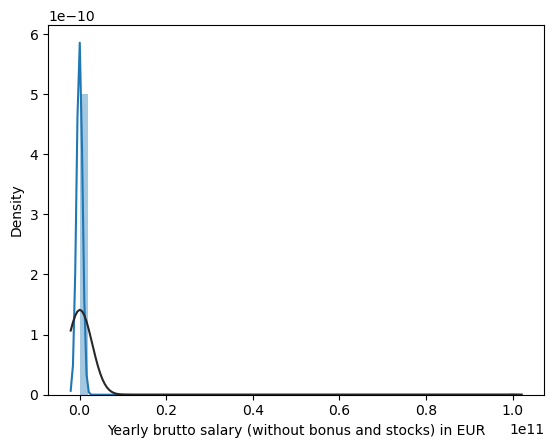

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Yearly brutto salary (without bonus and stocks) in EUR'], fit=stats.norm)

Проверим, отличается ли распределение выбранной зависимой переменной от нормального. Так как в выборке более 50 наблюдений, то будем использовать тест Колмогорова-Смирнова

In [158]:
stats.kstest(df['Yearly brutto salary (without bonus and stocks) in EUR'], 'norm', args=(df['Yearly brutto salary (without bonus and stocks) in EUR'].mean(), df['Yearly brutto salary (without bonus and stocks) in EUR'].std()))

KstestResult(statistic=0.5096189613156694, pvalue=2.8184304920054947e-302)

Вывод: распределение значимо отличается от нормального ($pvalue \leq 0.05 \Rightarrow$ H1 принимается). Теперь выясним, какие переменные коррелируют друг с другом

In [159]:
# Определяем границы выбросов на основе межквартильного размаха
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [160]:
df.corr()

,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
Age,1.000000,0.669726,0.371888,0.272403,0.322520,0.026804
Total years of experience,0.669726,1.000000,0.331909,0.441867,0.488856,0.032505
Years of experience in Germany,0.371888,0.331909,1.000000,0.316470,0.326317,0.115685
Yearly brutto salary (without bonus and stocks) in EUR,0.272403,0.441867,0.316470,1.000000,0.895119,-0.059855
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,0.322520,0.488856,0.326317,0.895119,1.000000,0.010565
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",0.026804,0.032505,0.115685,-0.059855,0.010565,1.000000


Все переменные почти не коррелируют между собой за исключением годовой зарплаты год назад ('Annual brutto salary') и годовой зарплаты сейчас ('Yearly brutto salary'). Думаю, это связано с тем, что зарплата специалиста в с течением года в большинстве случаев никак не изменялась. Так как корреляция зависимой переменной с переменной 'Annual brutto salary' больше 0.75, то не будем включать переменную 'Annual brutto salary' в предикторы. В качестве двух метрических выберем 'Age' и 'Total years of experience'. Коэффициент их корреляции с зависимой переменной меньше 0.75, так что можем включить их в метрические переменные

In [161]:
# Выкидываем из датафрейма столбцы, в которых единица встречается менее 15 раз (так как это не такие частые наблюдения)
def drop_columns(df):
    columns_to_delete = []
    for col in df.columns:
        if df[col].sum() < 15:
            columns_to_delete.append(col)
    df.drop(columns=columns_to_delete, inplace=True) 

df2 = df[['Age','Total years of experience']].copy()


dummies=pd.get_dummies(df['Your main technology / programming language'], prefix='Technology', prefix_sep='_', drop_first=True)
drop_columns(dummies)
df2 = pd.concat([df2, dummies], axis=1)

dummies=pd.get_dummies(df.City, prefix='City', prefix_sep='_', drop_first=True)
drop_columns(dummies)
df2 = pd.concat([df2, dummies], axis=1)

dummies=pd.get_dummies(df['Seniority level'], prefix='Slevel', prefix_sep='_', drop_first=True)
drop_columns(dummies)
df2 = pd.concat([df2, dummies], axis=1)

dummies=pd.get_dummies(df['Position '], prefix='Position', prefix_sep='_', drop_first=True)
drop_columns(dummies)
df2 = pd.concat([df2, dummies], axis=1)

dummies=pd.get_dummies(df['Company type'], prefix='Ctype', prefix_sep='_', drop_first=True)
drop_columns(dummies)
df2 = pd.concat([df2, dummies], axis=1)

df2 = pd.concat([df2, df['Yearly brutto salary (without bonus and stocks) in EUR']], axis=1).dropna()
x_mult = df2.iloc[:,:-1] # берем весь датафрейм без послелднего столбца
y = df2['Yearly brutto salary (without bonus and stocks) in EUR'] # последний столбец

In [162]:
import statsmodels.api as sm
x_mult_const = sm.add_constant(x_mult)
model = sm.OLS(y, x_mult_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              OLS Regression Results                                              
==================================================================================================================
Dep. Variable:     Yearly brutto salary (without bonus and stocks) in EUR   R-squared:                       0.504
Model:                                                                OLS   Adj. R-squared:                  0.484
Method:                                                     Least Squares   F-statistic:                     25.27
Date:                                                    Thu, 16 Nov 2023   Prob (F-statistic):          1.70e-126
Time:                                                            21:16:44   Log-Likelihood:                -11355.
No. Observations:                                                    1061   AIC:                         2.279e+04
Df Residuals:                                                        1019   BIC:                         2.300e+04
Df Model:                                                              41                                         
Covariance Type:                                                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        6.225e+04   4153.878     14.987      0.000    5.41e+04    7.04e+04
Age                             4.9319    105.925      0.047      0.963    -202.925     212.789
Total years of experience     614.1355    121.495      5.055      0.000     375.726     852.545
Technology_C#                -715.3660   2369.243     -0.302      0.763   -5364.518    3933.786
Technology_C++               4174.5008   2093.214      1.994      0.046      66.998    8282.003
Technology_Go                3571.7328   2634.703      1.356      0.176   -1598.330    8741.796
Technology_Java              1192.4679   1108.698      1.076      0.282    -983.124    3368.060
Technology_JavaScript        -127.5197   2321.609     -0.055      0.956   -4683.200    4428.161
Technology_Javascript         626.6159   2272.263      0.276      0.783   -3832.235    5085.467
Technology_Kotlin            4544.8997   2599.132      1.749      0.081    -555.363    9645.163
Technology_PHP              -5794.4602   1714.120     -3.380      0.001   -9158.069   -2430.851
Technology_Python            3346.2579   1280.469      2.613      0.009     833.600    5858.916
Technology_Python             342.5508   2863.268      0.120      0.905   -5276.024    5961.126
Technology_Ruby              1983.5618   2808.067      0.706      0.480   -3526.693    7493.816
Technology_Scala             6015.6308   2543.981      2.365      0.018    1023.591     1.1e+04
Technology_Swift            -1605.2609   2749.358     -0.584      0.559   -7000.311    3789.789
Technology_python             852.9438   2444.973      0.349      0.727   -3944.814    5650.702
City_Berlin                  7515.1154   1027.661      7.313      0.000    5498.542    9531.689
City_Cologne                   -8.4004   2821.405     -0.003      0.998   -5544.829    5528.028
City_Frankfurt               8185.8190   2068.070      3.958      0.000    4127.657    1.22e+04
City_Hamburg                 2406.6240   2144.598      1.122      0.262   -1801.709    6614.957
City_Munich                  9817.4629   1203.363      8.158      0.000    7456.111    1.22e+04
City_Stuttgart               3621.2467   2697.503      1.342      0.180   -1672.050    8914.544
Slevel_Head                  1.007e+04   3364.457      2.993      0.003    3468.251    1.67e+04
Slevel_Junior               -2.031e+04   3000.305     -6.770      0.000   -2.62e+04   -1.44e+04

## Характеристики модели

In [163]:
print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))

R^2 = 0.504129
F-test significance = 0.000000


Модель статически значима. Объясняет 50.41% вариации значений зависимой переменной.

## Оценка значимости регрессионых коэффициентов

In [164]:
f'Статистически значимые параметры модели: {model.pvalues[model.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Total years of experience' 'Technology_C++' 'Technology_PHP'\n 'Technology_Python' 'Technology_Scala' 'City_Berlin' 'City_Frankfurt'\n 'City_Munich' 'Slevel_Head' 'Slevel_Junior' 'Slevel_Lead' 'Slevel_Middle'\n 'Position_Designer (UI/UX)' 'Position_QA Engineer'\n 'Ctype_Consulting / Agency']"

In [165]:
f'Статистически незначимые параметры модели: {model.pvalues[model.pvalues >= 0.05].index.values}'

"Статистически незначимые параметры модели: ['Age' 'Technology_C#' 'Technology_Go' 'Technology_Java'\n 'Technology_JavaScript' 'Technology_Javascript' 'Technology_Kotlin'\n 'Technology_Python ' 'Technology_Ruby' 'Technology_Swift'\n 'Technology_python' 'City_Cologne' 'City_Hamburg' 'City_Stuttgart'\n 'Slevel_Senior' 'Position_Backend Developer' 'Position_Data Engineer'\n 'Position_Data Scientist' 'Position_DevOps' 'Position_Frontend Developer'\n 'Position_ML Engineer' 'Position_Mobile Developer'\n 'Position_Product Manager' 'Position_Software Engineer' 'Ctype_Product'\n 'Ctype_Startup']"

## Уравнение регрессии

In [166]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Уравнение регрессии: Y = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

Уравнение регрессии: Y = 62253.408529 + 4.93*Age + 614.14*Total years of experience + -715.37*Technology_C# + 4174.50*Technology_C++ + 3571.73*Technology_Go + 1192.47*Technology_Java + -127.52*Technology_JavaScript + 626.62*Technology_Javascript + 4544.90*Technology_Kotlin + -5794.46*Technology_PHP + 3346.26*Technology_Python + 342.55*Technology_Python  + 1983.56*Technology_Ruby + 6015.63*Technology_Scala + -1605.26*Technology_Swift + 852.94*Technology_python + 7515.12*City_Berlin + -8.40*City_Cologne + 8185.82*City_Frankfurt + 2406.62*City_Hamburg + 9817.46*City_Munich + 3621.25*City_Stuttgart + 10070.31*Slevel_Head + -20310.66*Slevel_Junior + 7124.16*Slevel_Lead + -12170.62*Slevel_Middle + -2193.70*Slevel_Senior + -20.20*Position_Backend Developer + 1672.87*Position_Data Engineer + 2811.76*Position_Data Scientist + -13009.18*Position_Designer (UI/UX) + 3490.08*Position_DevOps + -1784.93*Position_Frontend Developer + 4117.95*Position_ML Engineer + -1405.75*Position_Mobile Developer + 

## Интерпретация значений коэффициентов регрессии

- Рассмотрим коэффициент при переменной Age, которая отражает возраст специалиста в годах. Регрессионный коэффициент при переменной положительный и равен 4,93. Можно сделать вывод, что при увеличении возраста специалиста на один год в среднем можно ожидать прирост стоимости на 4,93 долларов в год.
- Рассмотрим коэффициент при переменной Total years of experience, которая отражает опыт работы специалиста в годах. Регрессионный коэффициент при переменной положительный и равен 614,14. Можно сделать вывод, что при увеличении опыта специалиста на один год в среднем можно ожидать прирост стоимости на 614,14 долларов в год.
- Рассмотрим коэффициент при переменной Technology_C#, которая отражает работает ли специалист на C#. Регрессионный коэффициент при переменной отрицательный и равен -715,37. Можно сделать вывод, что в среднем специалист по технологии С# получает на 715,37 долларов меньше в год.
- Рассмотрим коэффициент при переменной Technology_C++, которая отражает работает ли специалист на C++. Регрессионный коэффициент при переменной положительный и равен 4174,50. Можно сделать вывод, что в среднем специалист по технологии С++ получает на 4174,50 долларов больше в год.
- Рассмотрим коэффициент при переменной Technology_Go, которая отражает работает ли специалист на Golang. Регрессионный коэффициент при переменной положительный и равен 3571,73. Можно сделать вывод, что в среднем специалист по технологии Golang получает на 3571,73 долларов больше в год.
- Рассмотрим коэффициент при переменной Technology_PHP, которая отражает работает ли специалист на PHP. Регрессионный коэффициент при переменной отрицательный и равен -5794,46. Можно сделать вывод, что в среднем специалист по технологии PHP получает на 5794,46 долларов меньше в год.
- и т.д

## Диагностика модели

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
p = stats.kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.010


<AxesSubplot:ylabel='Density'>

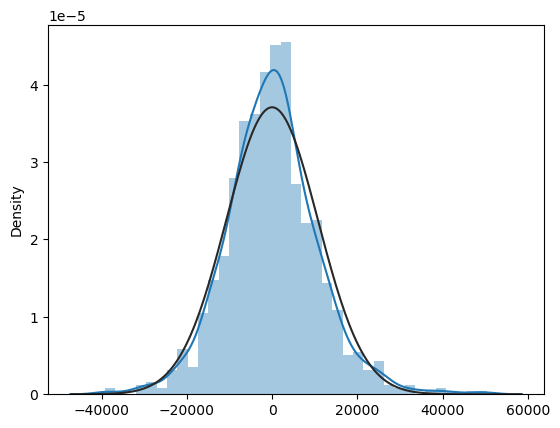

In [168]:
sns.distplot(model.resid, fit=stats.norm)

Распределение остатков похоже на нормальное распределение

## Гетероскедастичность

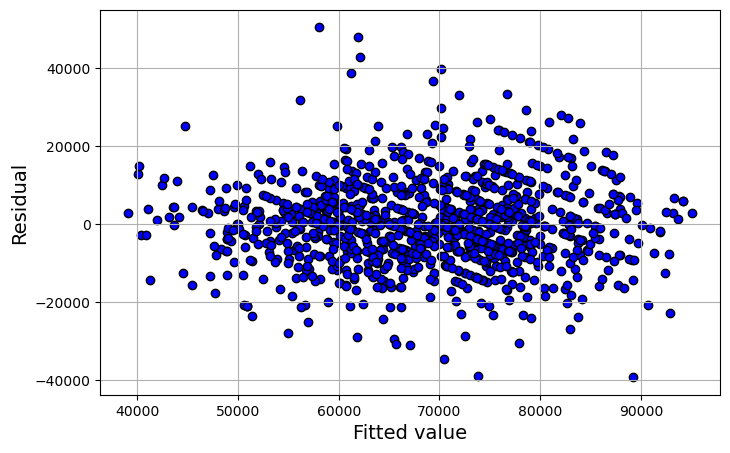

In [169]:
plt.figure(figsize=(8,5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

Наблюдается небольшая взаимосвязь между остатками и предсказанными значениями зависимой переменной. Следовательно может прослеживаться проблема гетероскедстичности.

## Мультиколлинеарность

In [170]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [171]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
4,1.074802,Technology_Go
2,1.092580,Technology_C#
12,1.094481,Technology_Ruby
17,1.104904,City_Cologne
13,1.105412,Technology_Scala
15,1.116137,Technology_python
21,1.126651,City_Stuttgart
3,1.128331,Technology_C++
11,1.137935,Technology_Python
30,1.138837,Position_Designer (UI/UX)


Есть несколько значений VIF больше 10, следовательно есть проблема мультиколлинеарности.

In [172]:
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_Age,dfb_Total years of experience,dfb_Technology_C#,dfb_Technology_C++,dfb_Technology_Go,dfb_Technology_Java,dfb_Technology_JavaScript,dfb_Technology_Javascript,dfb_Technology_Kotlin,...,dfb_Position_Software Engineer,dfb_Ctype_Consulting / Agency,dfb_Ctype_Product,dfb_Ctype_Startup,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.015026,-0.015538,-0.013557,-0.008133,-0.016649,-0.009883,-0.022820,-0.003273,-0.006570,-0.008782,...,0.017217,-0.005168,0.006463,-0.000226,0.000119,0.601865,0.013628,0.070746,0.601677,0.070724
1,0.019564,-0.025005,0.004037,0.001296,0.000503,-0.005021,-0.002811,0.000683,0.000860,-0.004134,...,-0.008479,-0.000880,0.000591,-0.005595,0.000555,0.583124,0.064206,0.152742,0.582935,0.152693
3,0.000524,-0.006886,0.012003,0.001165,0.003145,0.000989,0.004501,-0.008735,0.063728,0.002740,...,-0.004339,0.002065,0.004143,0.014480,0.000242,0.408955,0.057219,0.100749,0.408788,0.100708
4,0.009635,0.011375,-0.079900,0.027994,0.020702,0.032125,0.071697,0.007066,0.009696,0.029246,...,-0.010270,-0.001556,-0.009356,0.009564,0.000855,-1.471294,0.016314,-0.189472,-1.472137,-0.189581
5,-0.004786,0.008836,-0.016331,0.001650,0.000409,-0.003750,-0.000705,-0.000033,-0.002036,-0.001507,...,-0.000970,-0.001091,0.001377,0.009657,0.000056,0.273830,0.030465,0.048540,0.273705,0.048518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-0.002620,0.004297,-0.000528,-0.000128,-0.001149,0.004308,-0.020728,-0.000246,-0.000061,0.003561,...,0.003150,-0.000200,-0.001961,0.003046,0.000048,-0.391436,0.012941,-0.044821,-0.391274,-0.044802
1249,-0.011262,0.007993,-0.000130,0.013972,0.014084,0.019769,0.021885,0.008976,0.006398,0.009462,...,0.093481,-0.008803,-0.022625,-0.005036,0.000465,-1.257570,0.012206,-0.139795,-1.257929,-0.139835
1250,0.043970,0.054810,0.007184,0.014612,0.031812,0.018389,0.042429,0.008421,0.016623,0.025966,...,-0.173171,-0.221704,-0.290088,-0.250383,0.008330,2.543356,0.051308,0.591478,2.550215,0.593073
1251,-0.043630,0.052182,-0.050819,0.007085,0.006615,-0.009822,-0.012318,-0.207908,0.008754,-0.006185,...,-0.002420,-0.003161,-0.019133,-0.006890,0.002076,-1.315385,0.047972,-0.295271,-1.315857,-0.295377


In [173]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values() 
# потенциальные влияющие наблюдения

Series([], Name: dffits, dtype: float64)

In [174]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values() 
# потенциальные выбросы

939    -3.683694
261    -3.642233
617    -3.166662
42      3.042296
790     3.051412
936     3.384131
442     3.557928
1068    3.717155
425     3.971702
795     4.432613
1247    4.688540
Name: standard_resid, dtype: float64

## Вывод

1. Гипотеза о влиянии опыта работы на доход: опыт работы имеет статистически значимое влияние на годовой доход (Н1 принимаем, Н0 отвергаем).

2. Гипотеза о влиянии языка программирования на доход: выбранный язык программирования влияет на годовой доход (Н1 принимаем, Н0 отвергаем).

3. Гипотеза о влиянии возраста на доход: возраст не связан со значимыми изменениями в годовом доходе (Н0 принимаем, Н1 отвергаем).
 
4. Гипотеза о влиянии города на доход: город влияет на годовой доход IT специалистов (Н1 принимаем, Н0 отвергаем).

5. Гипотеза о влиянии типа компании на доход: тип компании не связан со значимыми изменениями в годовом доходе(Н0 принимаем, Н1 отвергаем).

6. Гипотеза о влиянии позиции на доход: позиция не связана со значимыми изменениями в годовом доходе (Н0 принимаем, Н1 отвергаем).

В целом, наши ожидания от регрессионного анализа оправдались, поскольку факторы, которые мы выбрали должны влиять на годовой доход, но удивило, что позиция особо не вносит существенных изменений в годовой доход. Также заметим, что возраст в данной области не влияет на средний доход, что является вполне очевидным результатом для IT-сферы. Остальные факторы оказывают статистически значимое влияние на годовой доход, что было для нас ожидаемо.

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 23:55 16 ноября.